In [132]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy import stats

In [362]:
# Import the datasets
Baseline = pd.read_excel('../Baseline.xlsx', 'Impacts', header=1).dropna(axis=1)
Baseline_LFP = pd.read_excel('../Baseline-LFP.xlsx', 'Impacts', header=1).dropna(axis=1)
CuFe = pd.read_excel('../CuFe.xlsx', 'Impacts', header=1).dropna(axis=1)
CuFe_LFP = pd.read_excel('../CuFe-LFP.xlsx', 'Impacts', header=1).dropna(axis=1)

Baseline.drop('Impact category UUID', axis=1, inplace=True)
Baseline_LFP.drop('Impact category UUID', axis=1, inplace=True)
CuFe.drop('Impact category UUID', axis=1, inplace=True)
CuFe_LFP.drop('Impact category UUID', axis=1, inplace=True)

Baseline['Scenario'] = 'Baseline'
Baseline_LFP['Scenario'] = 'Baseline-LFP'
CuFe['Scenario'] = 'CuFe'
CuFe_LFP['Scenario'] = 'CuFe-LFP'

dropped = [
    'Climate change: biogenic',
    'Climate change: fossil',
    'Climate change: land use and land use change',
    'Ecotoxicity: freshwater, inorganics',
    'Ecotoxicity: freshwater, organics',
    'Human toxicity: carcinogenic, inorganics',
    'Human toxicity: carcinogenic, organics',
    'Human toxicity: non-carcinogenic, inorganics',
    'Human toxicity: non-carcinogenic, organics'
]

for scenario in [Baseline, Baseline_LFP, CuFe, CuFe_LFP]:
    for cat in dropped:
        i = scenario[scenario['Impact category'] == cat].index
        scenario.drop(i, inplace=True)
    for i,row in scenario.iterrows():
        scenario.loc[i, 'Impact category'] = row['Impact category'] + ' [' + row['Reference unit'] + ']'
    scenario.drop('Reference unit', axis=1, inplace=True)

c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\ProgramData\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [98]:
# Baseline_LFP['Result'] /= Baseline['Result'] * 100
# CuFe['Result'] /= Baseline['Result'] * 100
# CuFe_LFP['Result'] /= Baseline['Result'] * 100
# Baseline['Result'] /= Baseline['Result'] * 100 - 100

In [ ]:
# Baseline['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# Baseline_LFP['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# CuFe['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']
# CuFe_LFP['Impact category'] = ['A', 'CC', 'CCb', 'CCf', 'CClu', 'ETf', 'ETfi', 'ETfo', 'ERnr', 'Ef', 'Em', 'Et', 'HTc', 'HTci', 'HTco', 'HTnc', 'HTnci', 'HTnco', 'IRhh', 'LU', 'MRmm', 'OD', 'PMF', 'POFhh', 'WU']

In [420]:
df = pd.concat([Baseline, Baseline_LFP, CuFe, CuFe_LFP])
pivot_df = df.pivot(columns='Scenario', index='Impact category', values='Result')
# pivot_df.reindex(index=df['Impact category'].unique(), columns=df['Scenario'].unique())

In [417]:
def parse_plot_df(pivot_df, i):
    df = pivot_df.copy()
    for j in range(len(df)):
        if j != i:
            df.drop(Baseline['Impact category'].iloc[j], inplace=True)
    return df

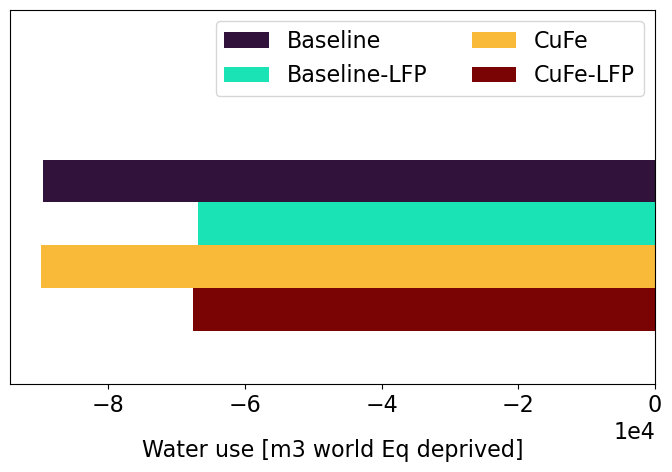

In [480]:
# Plot the histograms using full data
plot_df = pivot_df.copy()

fig, ax = plt.subplots(figsize=(7, 5))
mpl.rcParams.update({'font.size': 16})

# for i, ax in enumerate(axs.flatten()):
#     # ax = plt.subplot(8, 2, i + 1)
#     plot_df = parse_plot_df(pivot_df, i)
#     plot_df[::-1].plot(
#         kind='barh',
#         ax=ax,
#         cmap=mpl.colormaps['turbo'],
#         align='edge',
#         width=0.5,
#         # edgecolor='white',
#         # linewidth=10
#     )
#     ax.axes.get_yaxis().set_visible(False)
#     ax.set_xlabel(pivot_df.index.values[i], labelpad=16)
#     ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
#     plt.gca().invert_yaxis()
#     ax.get_legend().remove()

i = 15
plot_df = parse_plot_df(pivot_df, i)
# plot_df = pivot_df.iloc[i]
plot_df[::-1].plot(
    kind='barh',
    ax=ax,
    cmap=mpl.colormaps['turbo'],
    # align='down',
    width=0.8,
)
ax.ticklabel_format(axis='x', style='sci', scilimits=(-3, 3))
ax.set_xlabel(pivot_df.index.values[i], labelpad=16) #, fontdict={'size': 14})
ax.axes.get_yaxis().set_visible(False)
plt.yticks([-1.1])
plt.gca().invert_yaxis()
# ax.legend(bbox_to_anchor=(1, -0.2))
ax.legend(ncols=2)
plt.tight_layout()
plt.show()